In [1]:
import pymysql
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D,axes3d

In [2]:
connect = pymysql.connect(host='rr-bp1g814zgqeptx52q.mysql.rds.aliyuncs.com',user = 'qkids_stats',password='Stats$qkids', db='jiuqu_schedule_api', charset='utf8')
cur = connect.cursor()

In [3]:
sql = " select case date_format(s.begin_at ,'%%w') when 0 then 7 else date_format(s.begin_at ,'%%w') end , \
case date_format(begin_at, '%%H:%%i') \
when '08:40' then 1 when '09:20' then 2 when '10:00' then 3 when '10:40' then 4 when '11:20' then 5 \
when '18:40' then 6 when '19:20' then 7 when '20:00' then 8 when '20:40' then 8 else 0 \
end slot, \
count(*) \
from student_appointments  sa inner join  (select id, begin_at from schedules where date_format(begin_at, '%%Y-%%u')  = '%s' and date_format(begin_at, '%%H:%%i') in ('08:40', '09:20', \
'10:00', '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') and is_internal = 0)  s on sa.schedule_id = s.id \
where sa.status in (3,4,5) and sa.deleted_at is null \
group by s.begin_at; " 
date = '2018-05'
cur.execute(sql % date)
data = cur.fetchall()
ndata_5 = np.array(data).astype(np.int32)

date = '2018-06'
cur.execute(sql % date)
data = cur.fetchall()
ndata_6 = np.array(data).astype(np.int32)

date = '2018-07'
cur.execute(sql % date)
data = cur.fetchall()
ndata_7 = np.array(data).astype(np.int32)

date = '2018-08'
cur.execute(sql % date)
data = cur.fetchall()
ndata_8 = np.array(data).astype(np.int32)


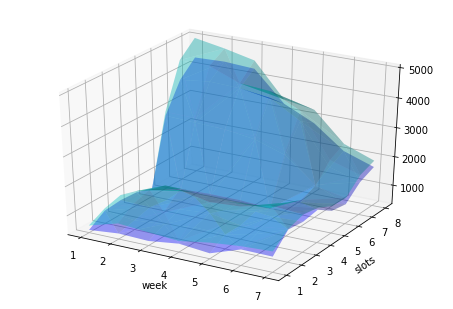

In [4]:
fig = plt.figure(1)
ax = Axes3D(fig)
#ax.scatter(ndata[:, 0],ndata[:, 1],ndata[:, 2])
ax.plot_trisurf(ndata_5[:, 0],ndata_5[:, 1],ndata_5[:, 2], alpha=0.4, color='b')
ax.plot_trisurf(ndata_6[:, 0],ndata_6[:, 1],ndata_6[:, 2], alpha=0.4, color='c')
# ax.plot_trisurf(ndata_7[:, 0],ndata_7[:, 1],ndata_7[:, 2], alpha=0.4, color='r')
# ax.plot_trisurf(ndata_8[:, 0],ndata_8[:, 1],ndata_8[:, 2], alpha=0.6, color='y')

ax.set_xlabel('week')
ax.set_ylabel('slots')
plt.show()

In [5]:
matrix_sql = " select \
sum(case when date_format(s.begin_at ,'%%w') = 1 then 1 else 0 end) monday, \
sum(case when date_format(s.begin_at ,'%%w') = 2 then 1 else 0 end) tuesday, \
sum(case when date_format(s.begin_at ,'%%w') = 3 then 1 else 0 end) wednesday,\
sum(case when date_format(s.begin_at ,'%%w') = 4 then 1 else 0 end) thursday,\
sum(case when date_format(s.begin_at ,'%%w') = 5 then 1 else 0 end) friday,\
sum(case when date_format(s.begin_at ,'%%w') = 6 then 1 else 0 end) Saturday,\
sum(case when date_format(s.begin_at ,'%%w') = 0 then 1 else 0 end) Sunday \
 from teacher_appointments  sa inner join  (select id, begin_at from schedules where date_format(begin_at, '%%Y-%%u')  = '%s' \
and date_format(begin_at, '%%H:%%i') in  \
('08:40', '09:20','10:00', '10:40', '11:20', '18:40', '19:20', '20:00', '20:40') and is_internal = 0) s \
 on sa.schedule_id = s.id where sa.status in (3,4,5) and sa.deleted_at is null group by DATE_FORMAT(s.begin_at, '%%H:%%i')"

In [6]:
date = '2018-05'
matrix_sql % date
cur.execute(matrix_sql % date)
data = cur.fetchall()
matrix_5 = np.array(data).astype(np.int32)

date = '2018-06'
matrix_sql % date
cur.execute(matrix_sql % date)
data = cur.fetchall()
matrix_6 = np.array(data).astype(np.int32)

In [7]:
matrix_6-matrix_5

array([[ 12,  78,  76,   7,  91,   9,  53],
       [  0,  98,  50,  34,  68,  74,  23],
       [ 14,  53, 128,  40,  78,  99,  64],
       [  1,  73,  60,  59,  65,  65,  30],
       [-19,   5,   6,  16,  -2,  12,  40],
       [ 82, -32,  32,  14, 112,  -8,  36],
       [119,  94,  75, 102, 105,  55,  54],
       [ 99, 106,  63, 110, 177,  51,  44],
       [107,  96, 100,  61, 184,  51,  72]], dtype=int32)

In [8]:
(matrix_6-matrix_5) / matrix_6

array([[ 0.05063291,  0.21195652,  0.23974763,  0.02222222,  0.27164179,
         0.02486188,  0.15634218],
       [ 0.        ,  0.24623116,  0.14124294,  0.09066667,  0.18378378,
         0.16086957,  0.06149733],
       [ 0.0530303 ,  0.13910761,  0.32405063,  0.10582011,  0.20967742,
         0.21336207,  0.15802469],
       [ 0.00471698,  0.2218845 ,  0.17751479,  0.18153846,  0.20833333,
         0.15550239,  0.08426966],
       [-0.12666667,  0.02212389,  0.02564103,  0.06504065, -0.00947867,
         0.03529412,  0.12738854],
       [ 0.10718954, -0.04604317,  0.04188482,  0.01820546,  0.15620642,
        -0.02234637,  0.1220339 ],
       [ 0.11365807,  0.08884688,  0.07507508,  0.09817132,  0.11413043,
         0.11156187,  0.13533835],
       [ 0.08935018,  0.0951526 ,  0.05670567,  0.09847807,  0.17302053,
         0.09222423,  0.09649123],
       [ 0.10490196,  0.09467456,  0.09775171,  0.06243603,  0.19429778,
         0.09659091,  0.1589404 ]])

+ 05 1.29 ~ 2.4
+ 06 2.5  ~ 2.11
+ 07 2.12 ~ 2.18
+ 08 2.19 ~ 2.25
+ 09 2.26 ~ 3.4
+ 10 3.5  ~ 3.11